## Building a Basic Recommendation System

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
credits = pd.read_csv("tmdb_5000_credits.csv")
movies = pd.read_csv("tmdb_5000_movies.csv")

In [3]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits.shape

(4803, 4)

In [6]:
movies.shape

(4803, 20)

In [7]:
movies_data = movies.merge(credits, left_on = "id", right_on = "movie_id")

In [8]:
movies_data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [9]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

### Using Weighted average for each movie's  Average Rating

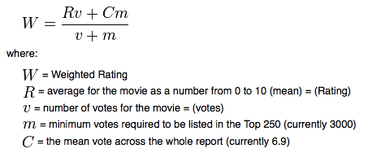

In [10]:
R = movies_data['vote_average']
v = movies_data['vote_count']
m = movies_data['vote_count'].quantile(0.70)
C = movies_data['vote_average'].mean()

In [11]:
movies_data['Weighted_average'] = ((R * v) + (C * m)) / (v + m)

In [12]:
movies_data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title_x,vote_average,vote_count,movie_id,title_y,cast,crew,Weighted_average
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.148013
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.807627


In [13]:
movies_sorted_data = movies_data.sort_values(by = "Weighted_average", ascending = False)
movies_sorted_data[['original_title', 'popularity', 'vote_average', 'vote_count', 'Weighted_average']].head(10)

,original_title,popularity,vote_average,vote_count,Weighted_average
1881,The Shawshank Redemption,136.747729,8.5,8205,8.340775
3337,The Godfather,143.659698,8.4,5893,8.192887
662,Fight Club,146.757391,8.3,9413,8.171648
3232,Pulp Fiction,121.463076,8.3,8428,8.157615
65,The Dark Knight,187.322927,8.2,12002,8.102674
809,Forrest Gump,138.133331,8.2,7927,8.056059
1818,Schindler's List,104.469351,8.3,4329,8.038748
3865,Whiplash,192.528841,8.3,4254,8.034695
96,Inception,167.583710,8.1,13752,8.018611
1990,The Empire Strikes Back,78.517830,8.2,5879,8.010426


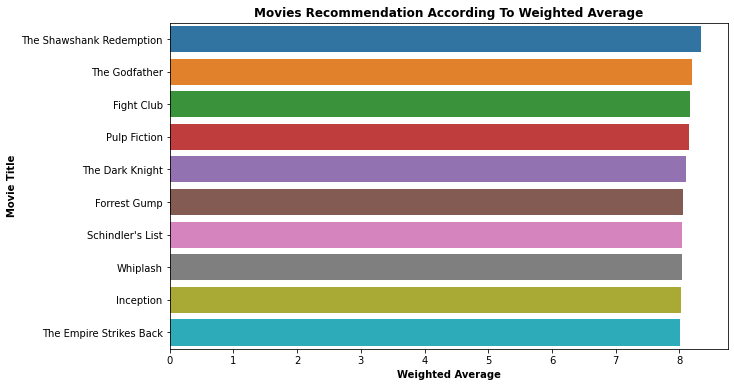

In [14]:
plt.figure(figsize = (10,6))
sns.barplot(x = movies_sorted_data['Weighted_average'].head(10), y = movies_sorted_data['original_title'].head(10))
plt.title('Movies Recommendation According To Weighted Average', weight = 'bold')
plt.xlabel('Weighted Average', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.show()

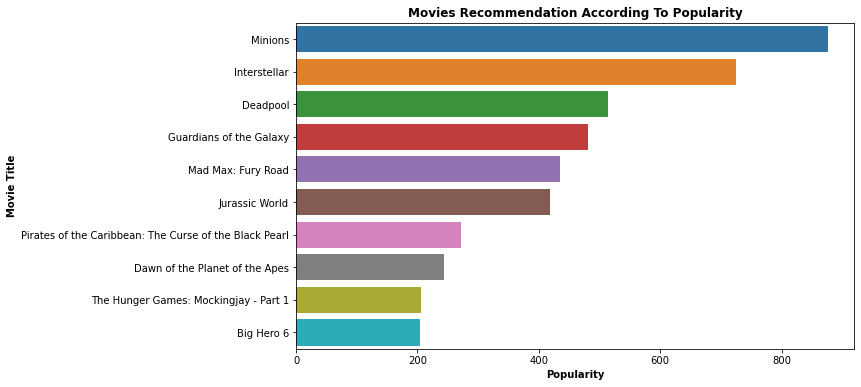

In [15]:
popularity = movies_sorted_data.sort_values('popularity',ascending=False)

plt.figure(figsize = (10,6))
sns.barplot(x = popularity['popularity'].head(10), y = popularity['original_title'].head(10))
plt.title('Movies Recommendation According To Popularity', weight = 'bold')
plt.xlabel('Popularity', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.show()

### Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)

In [16]:
scaling = MinMaxScaler()
movies_scaled_data = scaling.fit_transform(movies_data[['Weighted_average', 'popularity']])
movies_normalized_data = pd.DataFrame(movies_scaled_data, columns = ['Weighted_average', 'popularity'])

In [17]:
movies_normalized_data.head()

,Weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [18]:
movies_normalized_data['original_title'] = movies_data['original_title']

In [19]:
movies_normalized_data['score'] = movies_normalized_data["Weighted_average"] * 0.5 + movies_normalized_data['popularity'] * 0.5
movies_normalized_data = movies_normalized_data.sort_values('score', ascending = False)
movies_normalized_data[['original_title', 'Weighted_average', 'popularity', 'score']].head(10)

,original_title,Weighted_average,popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


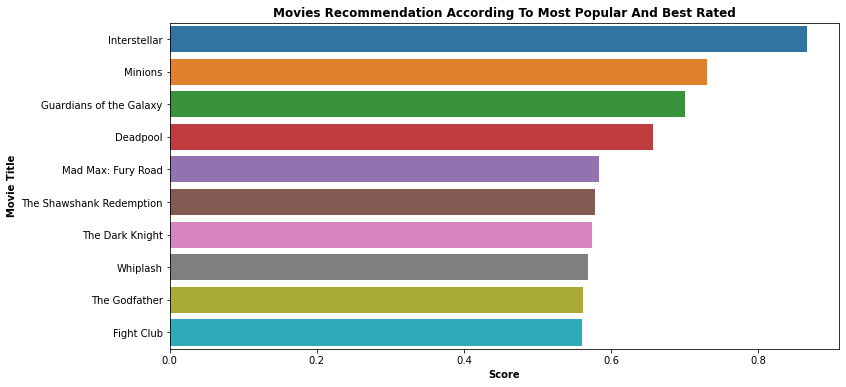

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = movies_normalized_data['score'].head(10), y = movies_normalized_data['original_title'].head(10))
plt.title('Movies Recommendation According To Most Popular And Best Rated', weight = 'bold')
plt.xlabel('Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')
plt.show()

### Content Based Recommendation System

Now lets make a recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

In [21]:
movies_data.overview[0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 3, 
                        strip_accents = 'unicode', 
                        analyzer='word', 
                        token_pattern=r'\w{1,}',
                        ngram_range=(1, 3),
                        stop_words = 'english')

In [23]:
movies_data.overview.isna().sum()

3

In [24]:
# Filling NaNs with empty string
movies_data['overview'] = movies_data['overview'].fillna('')

In [25]:
tfidf_matrix = tfidf.fit_transform(movies_data['overview'])

In [26]:
tfidf_matrix.shape

(4803, 10417)

In [27]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfidf_matrix, tfidf_matrix)

In [28]:
sig[1]

array([0.76159416, 0.76163447, 0.76159416, ..., 0.76159513, 0.76159416,
       0.76159416])

In [29]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies_data.index, index = movies_data.original_title)
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [30]:
def give_rec(title, sig = sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores with index
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key = lambda x : x[1], reverse = True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies_data['original_title'].iloc[movie_indices]

In [31]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('The Godfather')

2731     The Godfather: Part II
1873                 Blood Ties
3727                Snabba Cash
867     The Godfather: Part III
3623                       Made
3960               The Deported
2389                Renaissance
2464     The Master of Disguise
3760             The Jerky Boys
3164               Mine vaganti
Name: original_title, dtype: object